In [ ]:
import numpy as np
import pandas as pd


In [ ]:
#split and read the dataset
fileData = pd.ExcelFile('/content/RFM Analysis.xlsx')
df1_transactions = pd.read_excel(fileData, 'Transactions')
df2_newcustomerlist = pd.read_excel(fileData, 'NewCustomerList')
df3_customerdemographic = pd.read_excel(fileData, 'CustomerDemographic')
df4_customeraddress = pd.read_excel(fileData, 'CustomerAddress')

**Sheet One**

In [ ]:
# Discover and Visualize the Data
print(df1_transactions.head())  # Display the first few rows
print(df1_transactions.info())  # Display basic information about the dataset

   transaction_id  product_id  customer_id transaction_date  online_order  \
0               1           2         2950       2017-02-25           0.0   
1               2           3         3120       2017-05-21           1.0   
2               3          37          402       2017-10-16           0.0   
3               4          88         3135       2017-08-31           0.0   
4               5          78          787       2017-10-01           1.0   

  order_status           brand product_line product_class product_size  \
0     Approved           Solex     Standard        medium       medium   
1     Approved   Trek Bicycles     Standard        medium        large   
2     Approved      OHM Cycles     Standard           low       medium   
3     Approved  Norco Bicycles     Standard        medium       medium   
4     Approved  Giant Bicycles     Standard        medium        large   

   list_price  standard_cost  product_first_sold_date  
0       71.49          53.62        

In [ ]:
print(df1_transactions.isnull().sum())
print(df1_transactions.duplicated().sum())
print(df1_transactions.shape)

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64
0
(20000, 13)


In [ ]:
transactions_clean = df1_transactions.dropna()
transactions_clean['standard_cost'] = transactions_clean['standard_cost'].replace('$', '', regex=False)
print(transactions_clean.shape)

(19445, 13)


<ipython-input-4-559fff66c73c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions_clean['standard_cost'] = transactions_clean['standard_cost'].replace('$', '', regex=False)


In [ ]:
transactions_clean['transaction_date'] = pd.to_datetime(transactions_clean['transaction_date'])
transactions_clean['day'] = transactions_clean['transaction_date'].dt.day
transactions_clean['month'] = transactions_clean['transaction_date'].dt.month
transactions_clean['year'] = transactions_clean['transaction_date'].dt.year

<ipython-input-5-b404c49e19a3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions_clean['transaction_date'] = pd.to_datetime(transactions_clean['transaction_date'])
<ipython-input-5-b404c49e19a3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions_clean['day'] = transactions_clean['transaction_date'].dt.day
<ipython-input-5-b404c49e19a3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


In [ ]:
print(transactions_clean['order_status'].unique())
print(transactions_clean['day'].unique())
print(transactions_clean['month'].unique())
print(transactions_clean['year'].unique())
print(transactions_clean['brand'].unique())
print(transactions_clean['product_line'].unique())
print(transactions_clean['product_class'].unique())
print(transactions_clean['product_size'].unique())

['Approved' 'Cancelled']
[25 21 16 31  1  8 15 10 30 17  5 26 11  3  2  6 28  9 29 18 23 13 20  7
 12 14 22 24 27 19  4]
[ 2  5 10  8  3  4  7  1  9  6 12 11]
[2017]
['Solex' 'Trek Bicycles' 'OHM Cycles' 'Norco Bicycles' 'Giant Bicycles'
 'WeareA2B']
['Standard' 'Road' 'Mountain' 'Touring']
['medium' 'low' 'high']
['medium' 'large' 'small']


In [ ]:
transactions_clean.to_excel('transactions_clean.xlsx', index=False)

**Sheet Two**

In [ ]:
# Discover and Visualize the Data
print(df2_newcustomerlist.head())  # Display the first few rows
print(df2_newcustomerlist.info())  # Display basic information about the dataset

  first_name  last_name  gender  past_3_years_bike_related_purchases  \
0    Chickie    Brister    Male                                   86   
1      Morly     Genery    Male                                   69   
2    Ardelis  Forrester  Female                                   10   
3     Lucine      Stutt  Female                                   64   
4    Melinda     Hadlee  Female                                   34   

                   DOB                   job_title job_industry_category  \
0           1957-07-12             General Manager         Manufacturing   
1           1970-03-22         Structural Engineer              Property   
2  1974-08-28 00:00:00      Senior Cost Accountant    Financial Services   
3           1979-01-28  Account Representative III         Manufacturing   
4           1965-09-21           Financial Analyst    Financial Services   

      wealth_segment deceased_indicator owns_car  ...  state    country  \
0      Mass Customer               

In [ ]:
print(df2_newcustomerlist.isnull().sum())
print(df2_newcustomerlist.duplicated().sum())
print(df2_newcustomerlist.shape)

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Unnamed: 16                              0
Unnamed: 17                              0
Unnamed: 18                              0
Unnamed: 19                              0
Unnamed: 20                              0
Rank                                     0
Value                                    0
dtype: int6

In [ ]:
df2_newcustomerlist = df2_newcustomerlist.drop(columns=['Unnamed: 16' , 'Unnamed: 17' , 'Unnamed: 18' , 'Unnamed: 19' , 'Unnamed: 20'] )
df2_newcustomerlist = df2_newcustomerlist.reset_index(drop=True)


In [ ]:
newcustomer_clean = df2_newcustomerlist

In [ ]:
newcustomer_clean['customer_name'] = df2_newcustomerlist['first_name'] + ' ' + df2_newcustomerlist['last_name']
# Move 'customer_name' to index 0
cols = list(newcustomer_clean.columns)
cols.insert(0, cols.pop(cols.index('customer_name')))
newcustomer_clean = newcustomer_clean.loc[:, cols]
# Drop 'first_name' and 'last_name'
newcustomer_clean = newcustomer_clean.drop(['first_name', 'last_name'], axis=1)

In [ ]:
print(newcustomer_clean.head())

       customer_name  gender  past_3_years_bike_related_purchases  \
0    Chickie Brister    Male                                   86   
1       Morly Genery    Male                                   69   
2  Ardelis Forrester  Female                                   10   
3       Lucine Stutt  Female                                   64   
4     Melinda Hadlee  Female                                   34   

                   DOB                   job_title job_industry_category  \
0           1957-07-12             General Manager         Manufacturing   
1           1970-03-22         Structural Engineer              Property   
2  1974-08-28 00:00:00      Senior Cost Accountant    Financial Services   
3           1979-01-28  Account Representative III         Manufacturing   
4           1965-09-21           Financial Analyst    Financial Services   

      wealth_segment deceased_indicator owns_car  tenure              address  \
0      Mass Customer                  N      Ye

In [ ]:
newcustomer_clean['DOB'] = newcustomer_clean['DOB'].fillna('0')
newcustomer_clean['job_title'] = newcustomer_clean['job_title'].fillna('unknown')
newcustomer_clean['job_industry_category'] = newcustomer_clean['job_industry_category'].fillna('unknown')

In [ ]:
newcustomer_clean['customer_name'] = newcustomer_clean['customer_name'].fillna('unknown')

In [ ]:
newcustomer_clean = newcustomer_clean[newcustomer_clean['DOB'] != 0]
newcustomer_clean['DOB'] = pd.to_datetime(newcustomer_clean['DOB'], errors='coerce').dt.strftime('%Y-%m-%d')
newcustomer_clean['DOB'].unique()

array(['1957-07-12', '1970-03-22', '1974-08-28', '1979-01-28',
       '1965-09-21', '1951-04-29', '1976-10-06', '1972-12-27',
       '1972-04-28', '1985-08-02', '1995-01-01', '1999-08-30',
       '1990-05-13', '1976-12-09', '1964-04-19', '1954-03-31',
       '1993-08-22', '1976-06-08', '1938-11-09', '1954-08-12',
       '1968-12-21', '1993-09-29', '1998-02-05', '1977-12-17',
       '1982-10-11', '1945-08-03', '1952-06-27', '1966-07-20',
       '1960-12-10', '1960-11-22', '1980-01-26', '1951-11-28',
       '1987-01-15', '1981-09-22', '1977-05-09', '1975-05-10',
       '1968-03-25', '1979-04-11', '1955-06-13', '1993-08-28',
       '1953-02-13', '1985-03-14', '1946-10-25', '1966-09-18',
       '1961-12-05', '1956-08-30', '1956-07-16', '1994-12-04',
       '1977-05-14', '1950-05-03', '1978-02-11', '1999-03-22',
       '1993-12-19', '1981-12-01', '1995-03-25', '1981-02-03',
       '1979-12-17', '1972-10-31', '1966-07-29', nan, '1983-02-11',
       '1971-12-29', '1942-02-06', '1967-03-18', '

In [ ]:
newcustomer_clean['customer_age'] = 2017 - pd.to_datetime(newcustomer_clean['DOB']).dt.year

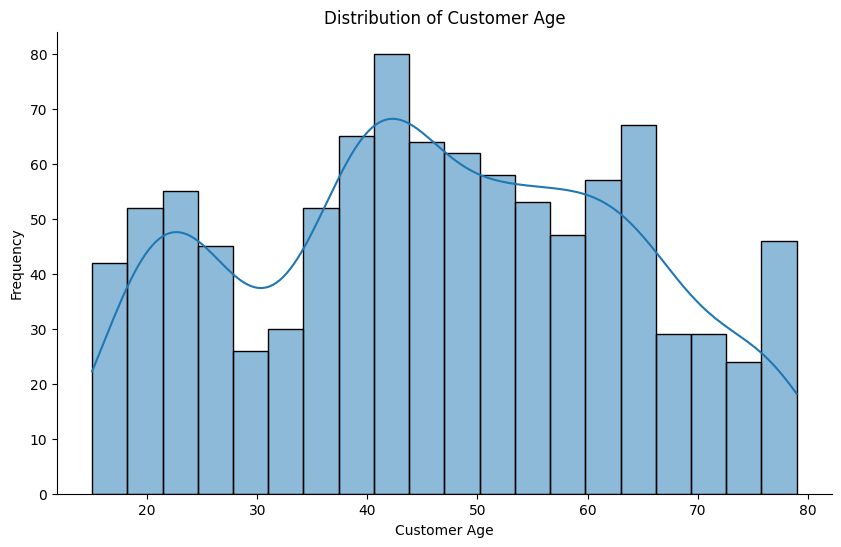

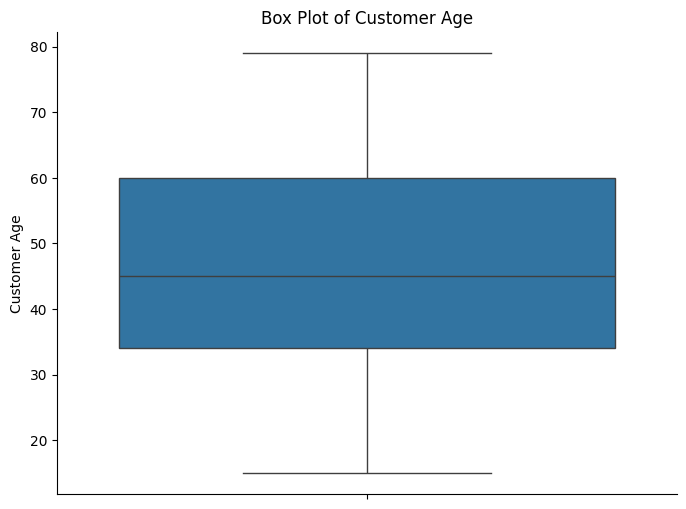

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution
plt.figure(figsize=(10, 6))
sns.histplot(newcustomer_clean['customer_age'], bins=20, kde=True)
plt.title('Distribution of Customer Age')
plt.xlabel('Customer Age')
plt.ylabel('Frequency')
plt.gca().spines[['top', 'right']].set_visible(False)  # Remove top and right spines
plt.show()

# Check for outliers using box plot
plt.figure(figsize=(8, 6))
sns.boxplot(y=newcustomer_clean['customer_age'])
plt.title('Box Plot of Customer Age')
plt.ylabel('Customer Age')
plt.gca().spines[['top', 'right']].set_visible(False)  # Remove top and right spines
plt.show()

In [ ]:
print(newcustomer_clean['customer_age'].unique())

[60. 47. 43. 38. 52. 66. 41. 45. 32. 22. 18. 27. 53. 63. 24. 79. 49. 19.
 40. 35. 72. 65. 51. 57. 37. 30. 36. 42. 62. 64. 71. 56. 61. 23. 67. 39.
 nan 34. 46. 75. 50. 21. 33. 29. 59. 44. 68. 25. 74. 17. 26. 77. 54. 48.
 78. 20. 76. 55. 16. 31. 28. 73. 58. 69. 70. 15.]


In [ ]:
newcustomer_clean['customer_age'] = newcustomer_clean['customer_age'].fillna(newcustomer_clean['customer_age'].mean())

In [ ]:
print(newcustomer_clean['gender'].unique())
print(newcustomer_clean['wealth_segment'].unique())
print(newcustomer_clean['owns_car'].unique())
print(newcustomer_clean['deceased_indicator'].unique())
print(newcustomer_clean['state'].unique())
print(newcustomer_clean['country'].unique())

['Male' 'Female' 'U']
['Mass Customer' 'Affluent Customer' 'High Net Worth']
['Yes' 'No']
['N']
['QLD' 'NSW' 'VIC']
['Australia']


In [ ]:
newcustomer_clean['gender'] = newcustomer_clean['gender'].replace('U', 'unknown')

In [ ]:
newcustomer_clean['state'] = newcustomer_clean['state'].replace(['QLD' ,'NSW' ,'VIC'], ['Queensland' ,'New South Wales' ,'Victoria'])

In [ ]:
newcustomer_clean.to_excel('newcustomer_clean.xlsx', index=False)

 **Sheet Three**

In [ ]:
# Discover and Visualize the Data
print(df3_customerdemographic.head())  # Display the first few rows
print(df3_customerdemographic.info())  # Display basic information about the dataset

   customer_id      first_name  last_name  gender  \
0            1         Laraine  Medendorp       F   
1            2             Eli    Bockman    Male   
2            3           Arlin     Dearle    Male   
3            4          Talbot        NaN    Male   
4            5  Sheila-kathryn     Calton  Female   

   past_3_years_bike_related_purchases                  DOB  \
0                                   93  1953-10-12 00:00:00   
1                                   81  1980-12-16 00:00:00   
2                                   61  1954-01-20 00:00:00   
3                                   33  1961-10-03 00:00:00   
4                                   56  1977-05-13 00:00:00   

                job_title job_industry_category     wealth_segment  \
0     Executive Secretary                Health      Mass Customer   
1  Administrative Officer    Financial Services      Mass Customer   
2      Recruiting Manager              Property      Mass Customer   
3                     

In [ ]:
print(df3_customerdemographic.isnull().sum())
print(df3_customerdemographic.duplicated().sum())
print(df3_customerdemographic.shape)

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64
0
(4000, 13)


In [ ]:
customerdemographic_clean = df3_customerdemographic.drop('default' , axis = 1 )
customerdemographic_clean= customerdemographic_clean.reset_index(drop=True)
customerdemographic_clean = customerdemographic_clean.dropna(subset=['DOB', 'tenure'])

In [ ]:
customerdemographic_clean['customer_name'] = customerdemographic_clean['first_name'] + ' ' + customerdemographic_clean['last_name']
# Move 'customer_name' to index 0
cols = list(customerdemographic_clean.columns)
cols.insert(0, cols.pop(cols.index('customer_name')))
customerdemographic_clean = customerdemographic_clean.loc[:, cols]
# Drop 'first_name' and 'last_name'
customerdemographic_clean = customerdemographic_clean.drop(['first_name', 'last_name'], axis=1)

In [ ]:
print(customerdemographic_clean.head())
print(customerdemographic_clean.isnull().sum())

           customer_name  customer_id  gender  \
0      Laraine Medendorp            1       F   
1            Eli Bockman            2    Male   
2           Arlin Dearle            3    Male   
3                    NaN            4    Male   
4  Sheila-kathryn Calton            5  Female   

   past_3_years_bike_related_purchases                  DOB  \
0                                   93  1953-10-12 00:00:00   
1                                   81  1980-12-16 00:00:00   
2                                   61  1954-01-20 00:00:00   
3                                   33  1961-10-03 00:00:00   
4                                   56  1977-05-13 00:00:00   

                job_title job_industry_category     wealth_segment  \
0     Executive Secretary                Health      Mass Customer   
1  Administrative Officer    Financial Services      Mass Customer   
2      Recruiting Manager              Property      Mass Customer   
3                     NaN                    I

In [ ]:
customerdemographic_clean.fillna('unknown', inplace=True)

In [ ]:
print(customerdemographic_clean['gender'].unique())
print(customerdemographic_clean['wealth_segment'].unique())
print(customerdemographic_clean['deceased_indicator'].unique())
print(customerdemographic_clean['owns_car'].unique())


['F' 'Male' 'Female' 'U' 'Femal' 'M']
['Mass Customer' 'Affluent Customer' 'High Net Worth']
['N' 'Y']
['Yes' 'No']


In [ ]:
customerdemographic_clean['gender'] = customerdemographic_clean['gender'].replace(['U','Femal','F','M'],
                                                                                  ['unknown', 'Female', 'Female', 'Male'])

In [ ]:
customerdemographic_clean['customer_age'] = 2017 - pd.to_datetime(customerdemographic_clean['DOB']).dt.year

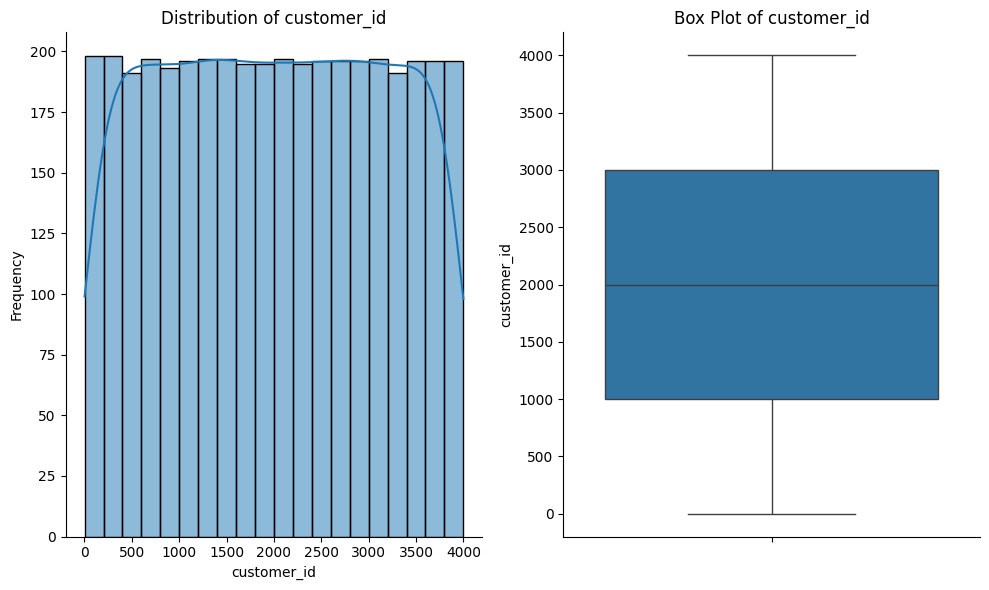

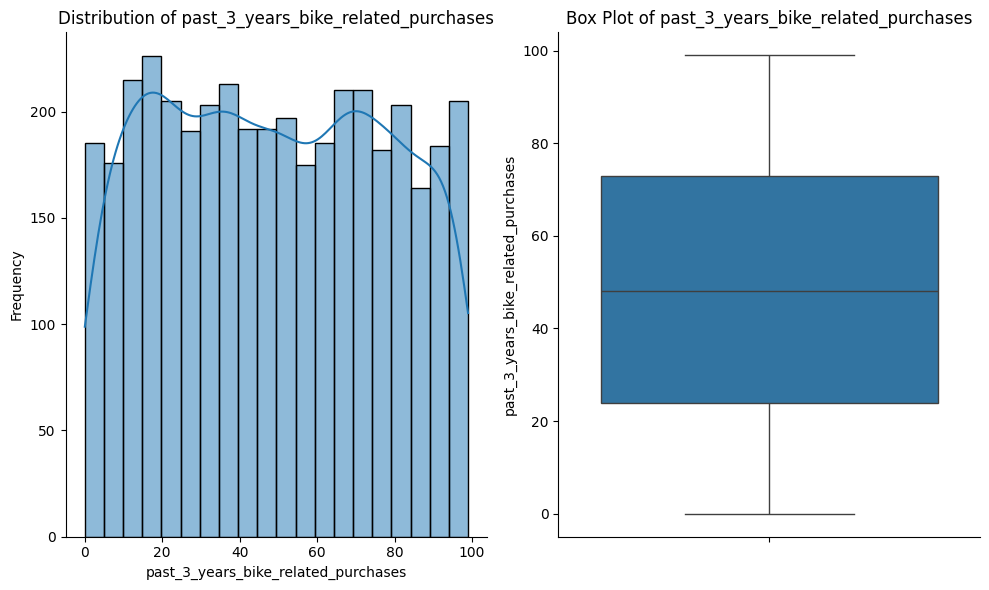

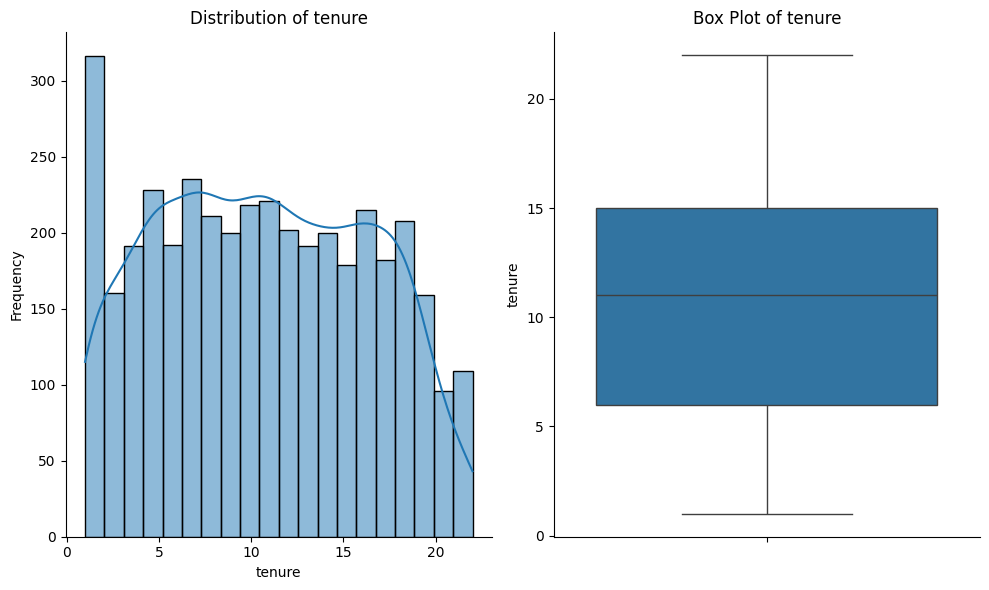

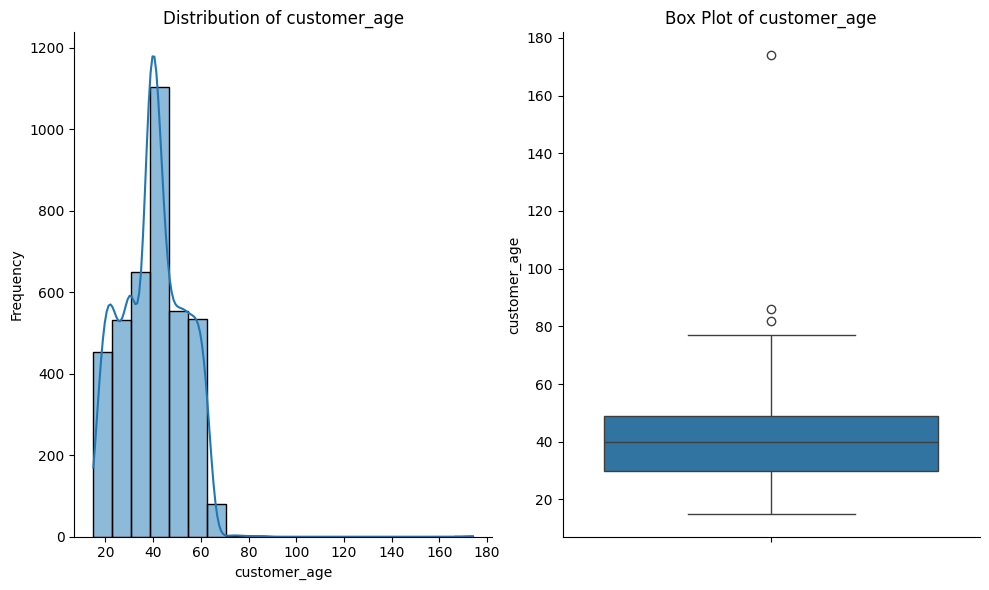

In [ ]:

# Select numeric columns
numeric_cols = customerdemographic_clean.select_dtypes(include=np.number).columns.tolist()

# Plot distribution and box plot for each numeric column
for col in numeric_cols:
    plt.figure(figsize=(10, 6))

    # Distribution plot
    plt.subplot(1, 2, 1)  # Create a subplot for distribution
    sns.histplot(customerdemographic_clean[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.gca().spines[['top', 'right']].set_visible(False)

    # Box plot
    plt.subplot(1, 2, 2)  # Create a subplot for box plot
    sns.boxplot(y=customerdemographic_clean[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
    plt.gca().spines[['top', 'right']].set_visible(False)

    plt.tight_layout()  # Adjust subplot spacing
    plt.show()

In [ ]:
print (customerdemographic_clean['customer_age'].unique())

[ 64  37  63  56  40  51  41  55  44  29  23  62  34  17  50  16  22  39
  49  60 174  54  32  38  36  42  45  25  58  61  21  47  52  15  57  43
  48  24  28  31  59  33  19  20  27  18  35  53  30  46  26  73  86  82
  74  77]


In [ ]:
customerdemographic_clean = customerdemographic_clean[customerdemographic_clean['customer_age'] != 174]

In [ ]:

customerdemographic_clean.to_excel('customerdemographic_clean.xlsx', index=False)


**Sheet Four**

In [ ]:
# Discover and Visualize the Data
print(df4_customeraddress.head())  # Display the first few rows
print(df4_customeraddress.info())  # Display basic information about the dataset

   customer_id              address  postcode            state    country  \
0            1   060 Morning Avenue      2016  New South Wales  Australia   
1            2  6 Meadow Vale Court      2153  New South Wales  Australia   
2            4   0 Holy Cross Court      4211              QLD  Australia   
3            5  17979 Del Mar Point      2448  New South Wales  Australia   
4            6     9 Oakridge Court      3216              VIC  Australia   

   property_valuation  
0                  10  
1                  10  
2                   9  
3                   4  
4                   9  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object

In [ ]:
print(df4_customeraddress.isnull().sum())
print(df4_customeraddress.duplicated().sum())
print(df4_customeraddress.shape)


customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64
0
(3999, 6)


In [ ]:
df4_customeraddress['state'] = df4_customeraddress['state'].replace(['QLD' ,'NSW' ,'VIC'], ['Queensland' ,'New South Wales' ,'Victoria'])

In [ ]:
df4_customeraddress.to_excel('customeraddress_clean.xlsx', index=False)

RFM calculations

In [ ]:
currernt_date = pd.to_datetime('2017-12-31')
recency = transactions_clean.groupby('customer_id')['transaction_date'].max()
recency = currernt_date - recency
recency = recency.dt.days
recency.head()

,transaction_date
customer_id,
1,8
2,129
3,103
4,196
5,17


In [ ]:
frequency = transactions_clean.groupby('customer_id')['transaction_id'].count()
frequency.head()

,transaction_id
customer_id,
1,11
2,3
3,7
4,2
5,6


In [ ]:
monetary = transactions_clean.groupby('customer_id')['list_price'].sum()
monetary.head()

,list_price
customer_id,
1,9084.45
2,4149.07
3,9525.22
4,1047.72
5,5903.20


In [ ]:
rfm_df = pd.DataFrame({'recency': recency, 'frequency': frequency, 'monetary': monetary})
rfm_df.index.name = 'customer_id'
rfm_df = rfm_df.reset_index()
rfm_df.head()


,customer_id,recency,frequency,monetary
0,1,8,11,9084.45
1,2,129,3,4149.07
2,3,103,7,9525.22
3,4,196,2,1047.72
4,5,17,6,5903.20


from matplotlib import pyplot as plt
_df_0['customer_id'].plot(kind='hist', bins=20, title='customer_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['recency'].plot(kind='hist', bins=20, title='recency')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['frequency'].plot(kind='hist', bins=20, title='frequency')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['monetary'].plot(kind='hist', bins=20, title='monetary')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='customer_id', y='recency', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='recency', y='frequency', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='frequency', y='monetary', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['customer_id']
  ys = series['recency']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('customer_id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('customer_id')
_ = plt.ylabel('recency')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['customer_id']
  ys = series['frequency']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('customer_id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('customer_id')
_ = plt.ylabel('frequency')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['customer_id']
  ys = series['monetary']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('customer_id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('customer_id')
_ = plt.ylabel('monetary')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['customer_id']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'customer_id'}, axis=1)
              .sort_values('customer_id', ascending=True))
  xs = counted['customer_id']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('customer_id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('customer_id')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_11['customer_id'].plot(kind='line', figsize=(8, 4), title='customer_id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['recency'].plot(kind='line', figsize=(8, 4), title='recency')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['frequency'].plot(kind='line', figsize=(8, 4), title='frequency')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['monetary'].plot(kind='line', figsize=(8, 4), title='monetary')
plt.gca().spines[['top', 'right']].set_visible(False)

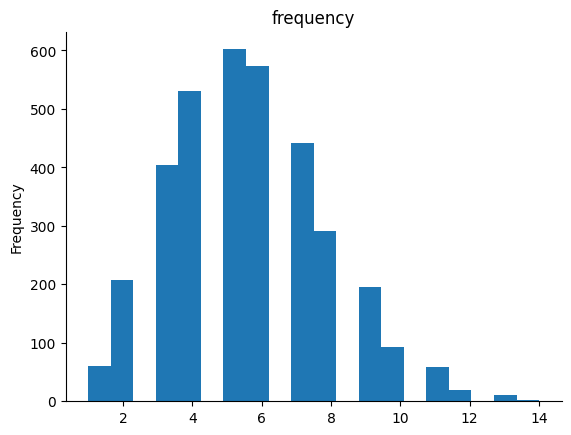

In [ ]:
# @title frequency

from matplotlib import pyplot as plt
rfm_df['frequency'].plot(kind='hist', bins=20, title='frequency')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
rfm_df.to_excel('rfm_df.xlsx', index=False)